# 🚀 **Kickstarter Campaigns 2009 - 2017: <br /> Understanding & Predicting Success**
============================================================ <br />
Jessica Gunther | CUS 610
## 📊 Dataset
* Kaggle: https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv
* 370K + kickstarter campaign records over nine years

## ✅ Outline of Analysis:
* **Phase 1: Preprocessing**
    * Understanding of dataframe, attributes and missing values
    * Creation of new attributes where necessary and/or beneficial to analysis
    * Review of summary statistics
* **Phase 2: Visualization**
    * Understanding attribute relationships, distributions and occurrences using matplotlib
* **Phase 3: Association Analysis**
    * Identifying strong associations in the dataset using Apriori 
    * Further supporting previous visualization section
* **Phase 4: Classification Model**
    * Build classification model using sklearn
    * Identify right combination of attributes that leads to highest accuracy
* **Phase 5: Predicting New Campaign Instances**
    * Allows user to input new campaign info
    * Using classification model, program will tell user the likely outcome of the campaign
    * Possibly: provide association rules or tips to increase likelihood of success
* **Phase 6: Discussion**
    * Analysis applications and possible future work

## Phase 1: Preprocessing

In [68]:
#load data into pandas dataframe

import csv
importgithy pandas as pd

#import data into a dataframe and view

data = pd.read_csv('kickstarter.csv')

data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


### Review data types and identify columns with missing values

In [69]:
#remove ID attribute (not valuable for analysis)
data.pop('ID')

#get basic information such as number of rows, columns, data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              378657 non-null  object 
 1   category          378661 non-null  object 
 2   main_category     378661 non-null  object 
 3   currency          378661 non-null  object 
 4   deadline          378661 non-null  object 
 5   goal              378661 non-null  float64
 6   launched          378661 non-null  object 
 7   pledged           378661 non-null  float64
 8   state             378661 non-null  object 
 9   backers           378661 non-null  int64  
 10  country           378661 non-null  object 
 11  usd pledged       374864 non-null  float64
 12  usd_pledged_real  378661 non-null  float64
 13  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 40.4+ MB


In [70]:
#there are missing values in the name column (only 4)
#there are missing values in the usd pledged column
#the usd pledged column is the same as the usd_pledged_real column, 
#but they were converted using differnt APIs
#therefore, I'm going to delete the usd pledged column which
#is missing values

f = data.pop('usd pledged')

#since there are only 4 name values that are null and we will 
#remove the name attribute anyway before running any ML algos,
#I will leave those records for initial analysis and visualizations

### Adding attributes:
* month: month campaign started
* length: time of campaign
* year: year of campaign 
* percent_goal: % of goal reached
* avg_contribute: avg. contribution size per campaign 

In [71]:
#add start month attribute 
def getmonths(df, column):
    months = []
    for i in range(len(df)):
        date = df.loc[i, column]
        if date[5:7] == '01':
            months.append('Jan')
        if date[5:7] == '02':
            months.append('Feb')
        if date[5:7] == '03':
            months.append('Mar')
        if date[5:7] == '04':
            months.append('Apr')
        if date[5:7] == '05':
            months.append('May')
        if date[5:7] == '06':
            months.append('Jun')
        if date[5:7] == '07':
            months.append('Jul')
        if date[5:7] == '08':
            months.append('Aug')
        if date[5:7] == '09':
            months.append('Sept')
        if date[5:7] == '10':
            months.append('Oct')
        if date[5:7] == '11':
            months.append('Nov')
        if date[5:7] == '12':
            months.append('Dec')
    return months

months = getmonths(data, 'launched')
data['month'] = months
            

In [72]:
#add length of campaign and year attribute
import datetime as dt
from datetime import datetime, timedelta

lengths = []
years = []
for i in range(len(data)):
    start = data.loc[i, 'launched']
    end = data.loc[i, 'deadline'].replace('-', '')
    start = start.replace('-', '')
    end = end.replace('-', '')
    temp = start.split()
    start = str(temp[0])
    end = pd.to_datetime(end, format='%Y%m%d')
    start = pd.to_datetime(start, format='%Y%m%d')
    start = start.date()
    end = end.date()
    temp = str(start)
    year = temp[0:4]
    years.append(year)
    difference = end - start
    conv = str(difference)
    days = int(conv[0:2])
    lengths.append(days)

data['length'] = lengths
    

In [73]:
data['year'] = years

In [74]:
#I will remove 'pledged' and 'goal' since these are
#the same as the usd columns (just unconverted to usd)

data.pop('goal')
data.pop('pledged')

#rename remaining pledged and goal columns for simplicity and legibility 
data = data.rename(columns={'usd_pledged_real' : 'pledged', 'usd_goal_real': 'goal'})

In [76]:
#add % to goal and avg_contribute 

percents = []
averages = []
for i in range(len(data)):
    if data.loc[i, 'pledged'] < 1 or data.loc[i, 'goal'] < 1 or data.loc[i, 'backers'] < 1:
        percents.append(0)
        averages.append(0)
    else:
        goal = data.loc[i, 'goal']
        pledged = data.loc[i, 'pledged']
        backers = data.loc[i, 'backers']
        percent = round((pledged / goal) * 100)
        average = round(pledged/backers)
        percents.append(percent)
        averages.append(average)
        
    
data['percent_goal'] = percents
data['avg_contribute'] = averages

In [77]:
#drop records that show the year as 1970 (some sort of mistake in the dataset)

for i in range(len(data)):
    if data.loc[i, 'year'] == '1970':
        data = data.drop(i)

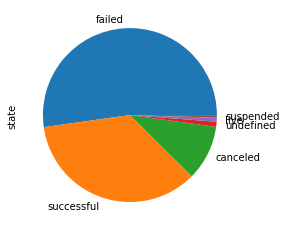

In [78]:
#Campaign state will be the class attribute, so I want to 
#see the distribution of states
import matplotlib.pyplot as plt

states = data['state'].value_counts()
display(states.plot(kind = 'pie'))

In [79]:
#because the vast majority of campaigns either failed or were successfule
#I am going to remove records with other outcome states (suspended, live, undefined, canceled)

data = data.drop(data[(data.state != 'successful') & (data.state != 'failed')].index)

### Reviewing summary statistics for each column

In [81]:
#function to output summary stats for numeric attributes
#and unique value counts for object attributes

def sum_stats(data, types):
    for i in range(len(types)):
        
        #do not want to include name, because each name value will be unique
        if types[i] == 'object' and types.index[i] != 'name':
            print('{}: object'.format(types.index[i]))
            print(data[types.index[i]].value_counts())
            print()
        if types[i] == 'int64' or types[i] == 'float64':
            print('{}: numeric'.format(types.index[i]))
            print(data[types.index[i]].describe())
            print()
            
data_types = data.dtypes
sum_stats(data, data_types)

category: object
Product Design     18680
Documentary        14523
Music              12633
Tabletop Games     11744
Shorts             11394
                   ...  
Residencies           68
Letterpress           46
Chiptune              33
Literary Spaces       19
Taxidermy             10
Name: category, Length: 159, dtype: int64

main_category: object
Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

currency: object
USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

deadline: object
2014-08-08    612


In [82]:
#descriptive statistics for numeric attributes
data.describe()

,backers,pledged,goal,length,percent_goal,avg_contribute
count,331675.000000,3.316750e+05,3.316750e+05,331675.000000,3.316750e+05,331675.000000
mean,116.381581,9.943461e+03,4.151000e+04,33.954875,3.420937e+02,66.083654
std,965.427268,9.673293e+04,1.108930e+06,12.713332,2.814949e+04,131.609984
min,0.000000,0.000000e+00,1.000000e-02,1.000000,0.000000e+00,0.000000
25%,2.000000,5.000000e+01,2.000000e+03,30.000000,1.000000e+00,17.000000
50%,15.000000,7.880000e+02,5.000000e+03,30.000000,2.000000e+01,42.000000
75%,63.000000,4.608000e+03,1.500000e+04,36.000000,1.090000e+02,78.000000
max,219382.000000,2.033899e+07,1.663614e+08,92.000000,1.042779e+07,10000.000000


* Average campaign length is 34 days
* Average goal is 41,510
* Avaerage pledged is 9,943
* Each campaign has an average of 116 backers
* Average contribution per campaign is 73

In [93]:
#writing cleaned data to another file (so I don't need to keep running above code)

outfile = open('clean_kickstarter.csv', 'w')
data.to_csv(outfile)

In [94]:
outfile.close()

## Phase Two: Data Visualizations

In [359]:
#load cleaned data into pandas dataframe

import csv
import pandas as pd
import matplotlib.pyplot as plt

#import data into a dataframe and view

data = pd.read_csv('clean_kickstarter.csv')
data.pop('Unnamed: 0')
data.pop('deadline')
data.pop('launched')

#some records have an erroneous country value, so I am removing those records
data = data.drop(data[(data.country == 'N,0"')].index)
data

,name,category,main_category,currency,state,backers,country,pledged,goal,month,length,year,percent_goal,avg_contribute
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,failed,0,GB,0.0,1533.95,Aug,59,2015,0.0,0.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,failed,15,US,2421.0,30000.00,Sept,60,2017,8.0,161.0
2,Where is Hank?,Narrative Film,Film & Video,USD,failed,3,US,220.0,45000.00,Jan,45,2013,0.0,73.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,failed,1,US,1.0,5000.00,Mar,30,2012,0.0,1.0
4,Monarch Espresso Bar,Restaurants,Food,USD,successful,224,US,52375.0,50000.00,Feb,35,2016,105.0,234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,"Homemade fresh dog food, Cleveland OH",Small Batch,Food,USD,failed,4,US,154.0,6500.00,Mar,30,2017,2.0,38.0
331671,The Tribe,Narrative Film,Film & Video,USD,failed,5,US,155.0,1500.00,Jun,27,2011,10.0,31.0
331672,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,failed,1,US,20.0,15000.00,Jul,46,2010,0.0,20.0
331673,BioDefense Education Kit,Technology,Technology,USD,failed,6,US,200.0,15000.00,Jan,31,2016,1.0,33.0


In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331465 entries, 0 to 331674
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            331462 non-null  object 
 1   category        331465 non-null  object 
 2   main_category   331465 non-null  object 
 3   currency        331465 non-null  object 
 4   state           331465 non-null  object 
 5   backers         331465 non-null  int64  
 6   country         331465 non-null  object 
 7   pledged         331465 non-null  float64
 8   goal            331465 non-null  float64
 9   month           331465 non-null  object 
 10  length          331465 non-null  int64  
 11  year            331465 non-null  int64  
 12  percent_goal    331465 non-null  float64
 13  avg_contribute  331465 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 37.9+ MB


				Campaign Counts


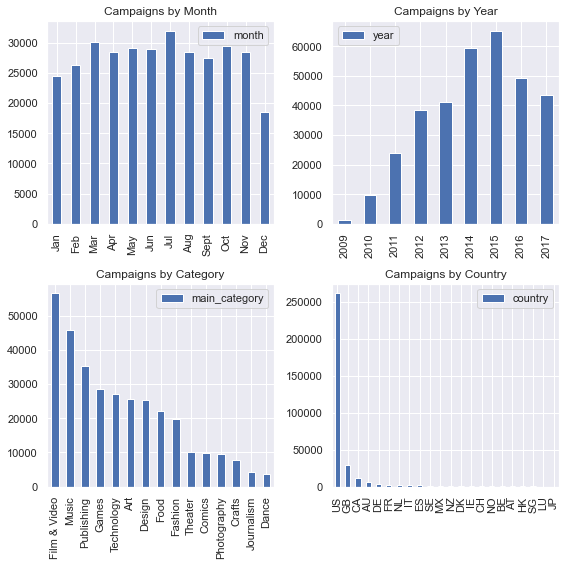

In [366]:
#function to visualize distributions for relevant attributes
import matplotlib.pyplot as plt

def view_counts(column):
    if column == 'main_category' or column == 'country':
        holder = data[column].value_counts()
    if column == 'year' or column == 'month':    
        holder = data[column].value_counts(sort = False)
    holder = holder.to_frame()
    if column == 'month':
        holder = holder.reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']) 
    index = holder.index
    return holder

cat = view_counts('main_category')
month = view_counts('month')
year = view_counts('year')
country = view_counts('country')

fig, name = plt.subplots(2,2, figsize=(8,8))
cat.plot(ax=name[1, 0], kind = 'bar', title = 'Campaigns by Category')
country.plot(ax=name[1, 1], kind = 'bar', title = 'Campaigns by Country')
month.plot(ax=name[0, 0], kind = 'bar', title ='Campaigns by Month')
year.plot(ax=name[0, 1], kind = 'bar', title = 'Campaigns by Year')
print('\t\t\t\tCampaign Counts')
print('=================='*4)
fig.tight_layout(pad=1.0)

* Film & Video is the most popular campaign category followed by Music and Publishing
* Vast majority of campaigns take place in the US
* Most popular month to host a campaign is in July
* The number of campaigns on kickstarter peaked in 2015 and then fell until 2017

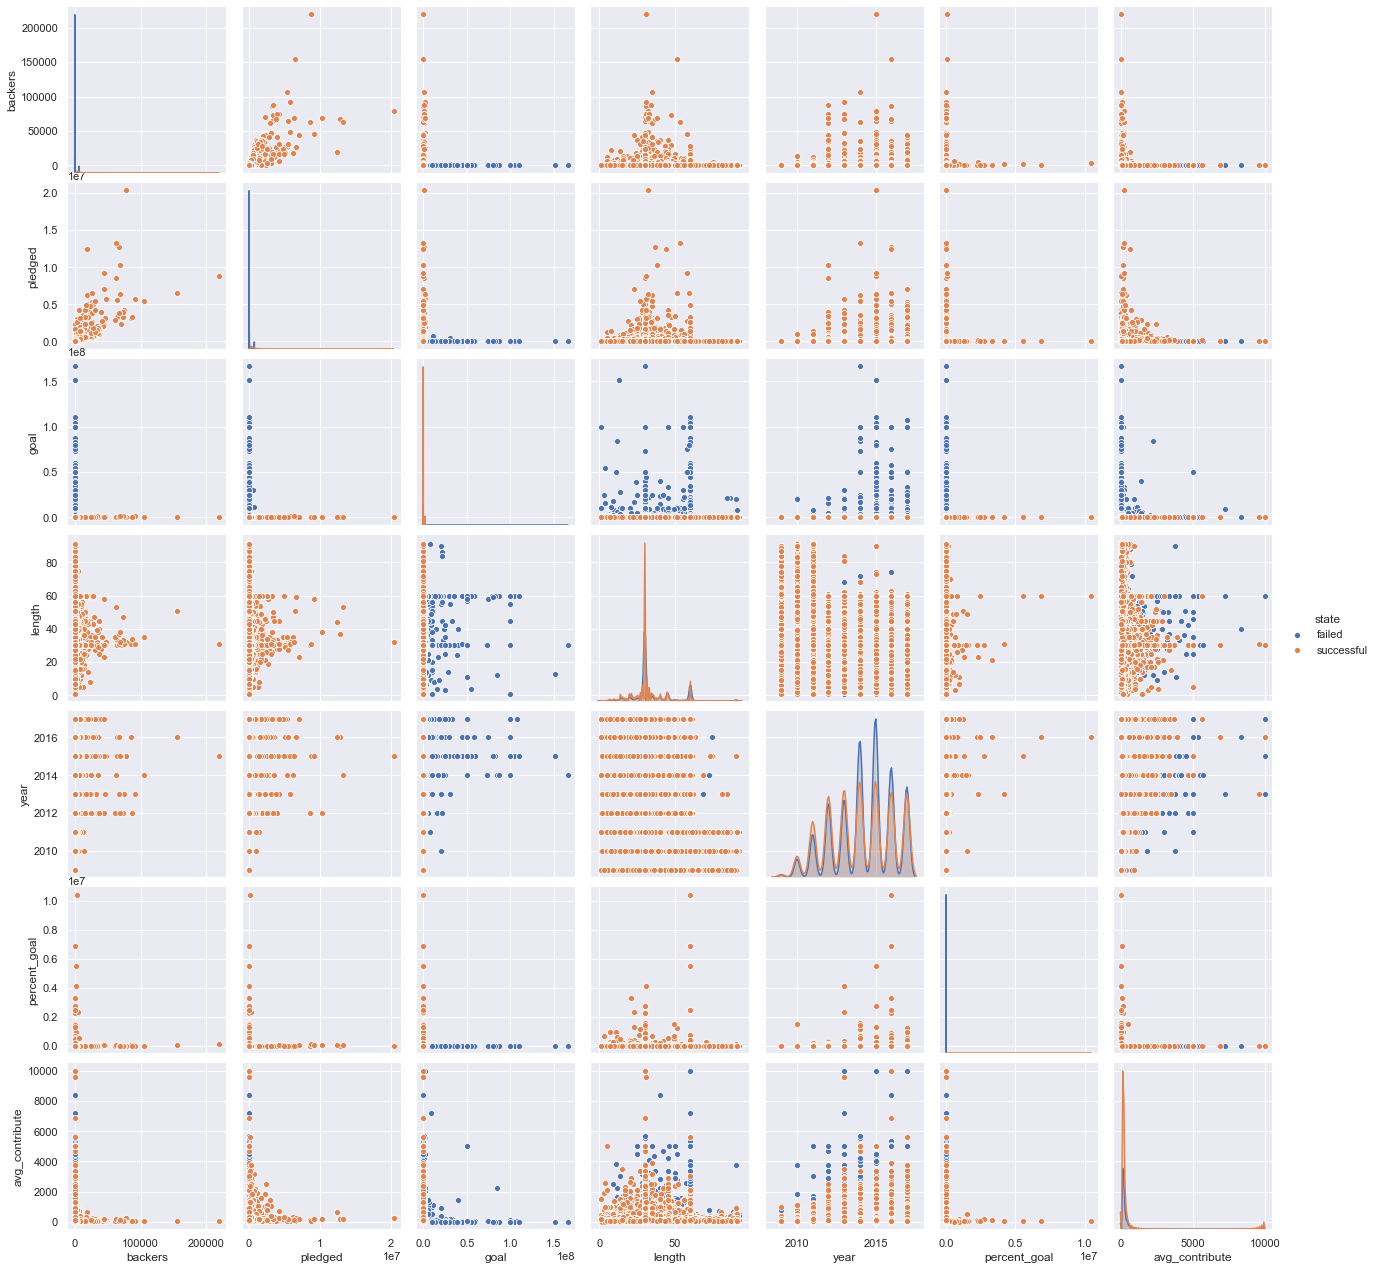

In [353]:
import seaborn as sns

#sns.set_theme(style="darkgrid")
#sns.displot(fig)

df = data
sns.pairplot(df, hue="state")

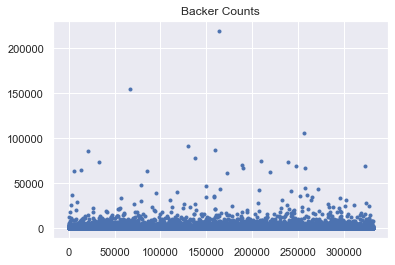

In [368]:
#visualizing backers as a scatter plot
#easy to see that the vast majority of campaigns have below 10,000 backers, but
#a few have many many more backers, which brings up the mean for the column

backers = data['backers']
display(backers.plot(style = '.', title = 'Backer Counts'))

* the vast majority of campaigns have below 10,000 backers, but a few outliers
    had many more, which brings up the average

40% of campaigns were successful
60% of campaigns failed


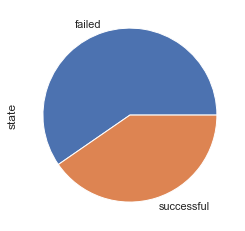

In [369]:
#visualizing counts of the different campaign states
states = data['state'].value_counts()
states.plot(kind='pie')

#calculating percentages of campaign states
failed = data[data.state == 'failed'].shape[0]
successful = data[data.state == 'successful'].shape[0]
p_failed = round((failed / (successful + failed)) * 100)
p_success = round((successful / (successful + failed)) * 100)
print('{}% of campaigns were successful\n{}% of campaigns failed'.format(p_success, p_failed))

* 40% of campaigns were successful
* 60% of campaigns failed

AxesSubplot(0.125,0.125;0.775x0.755)


,Year,failed,successful,total,%_failed,%_success
0,2009,600,579,1179,51.0,49.0
1,2010,4984,4593,9577,52.0,48.0
2,2011,11878,12171,24049,49.0,51.0
3,2012,20588,17892,38480,54.0,46.0
4,2013,21686,19402,41088,53.0,47.0
5,2014,38199,21106,59305,64.0,36.0
6,2015,44301,20971,65272,68.0,32.0
7,2016,30421,18675,49096,62.0,38.0
8,2017,24957,18462,43419,57.0,43.0


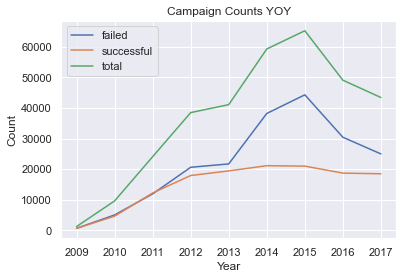

In [370]:
#show YOY states

def year_counts(a):
    f = data[(data.state == 'failed') & (data.year == a)].shape[0]
    s = data[(data.state == 'successful') & (data.year == a)].shape[0]
    return f, s


year_info = {}
for i in range(2009, 2018):
    q = str(i)
    b = year_counts(i)
    year_info[q] = b

state_year = pd.DataFrame.from_dict(year_info, orient='index')
state_year = state_year.rename(columns={0:'failed',1:'successful'})
state_year = state_year.reset_index()

totals = []
for i in range(len(state_year)):
    f = state_year.loc[i, 'failed']
    s = state_year.loc[i, 'successful']
    total = f + s
    totals.append(total)

state_year['total'] = totals
state_year = state_year.set_index('index')

j = state_year.plot(title = 'Campaign Counts YOY')
j.set_xlabel('Year')
j.set_ylabel('Count')
print(j)

state_year = state_year.reset_index()
p_failed = []
p_succeeded = []
for i in range(len(state_year)):
    failed = state_year.loc[i, 'failed']
    succ = state_year.loc[i, 'successful']
    total = failed + succ
    p_f = round((failed/total) * 100)
    p_s = round((succ/total) * 100)
    p_failed.append(p_f)
    p_succeeded.append(p_s)
state_year['%_failed'] = p_failed
state_year['%_success'] = p_succeeded

state_year = state_year.rename(columns={'index':'Year'})

state_year

* Up until 2011, failed and successful campaigns were growing at the same rate
* Starting 2013, the rate of failed campaigns grows significantly over successful campaigns
    until 2015, when the rate of failed campaigns trends down closer to the number of
    successful campaigns
* Overall campaign counts on the platform rises until 2015, when it starts to drop

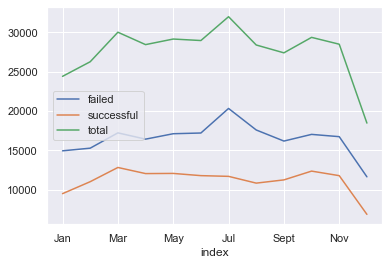

In [371]:
#months vs. states

def month_counts(a):
    f = data[(data.state == 'failed') & (data.month == a)].shape[0]
    s = data[(data.state == 'successful') & (data.month == a)].shape[0]
    return f, s


month_info = {}

month_info['Jan'] = month_counts('Jan')
month_info['Feb'] = month_counts('Feb')
month_info['Mar'] = month_counts('Mar')
month_info['Apr'] = month_counts('Apr')
month_info['May'] = month_counts('May')
month_info['Jun'] = month_counts('Jun')
month_info['Jul'] = month_counts('Jul')
month_info['Aug'] = month_counts('Aug')
month_info['Sept'] = month_counts('Sept')
month_info['Oct'] = month_counts('Oct')
month_info['Nov'] = month_counts('Nov')
month_info['Dec'] = month_counts('Dec')

state_month = pd.DataFrame.from_dict(month_info, orient='index')
state_month = state_month.rename(columns={0:'failed',1:'successful'})
state_month = state_month.reset_index()

totals = []
for i in range(len(state_month)):
    f = state_month.loc[i, 'failed']
    s = state_month.loc[i, 'successful']
    total = f + s
    totals.append(total)

state_month['total'] = totals
state_month = state_month.set_index('index')
state_month.plot()

In [235]:
#add percentage of success and fail to the table

p_suc = []
p_fail = []
for i in range(len(state_month)):
    f = state_month.loc[i, 'failed']
    s = state_month.loc[i, 'successful']
    t = state_month.loc[i, 'total']
    p_s = round((s / t) * 100)
    p_f = round((f / t) * 100)
    p_suc.append(p_s)
    p_fail.append(p_f)

state_month['%_failed'] = p_fail  
state_month['%_success'] = p_suc 
state_month.pop('level_0')
state_month

,index,failed,successful,total,%_failed,%_success
0,Jan,14933,9480,24413,61.0,39.0
1,Feb,15274,11003,26277,58.0,42.0
2,Mar,17249,12851,30100,57.0,43.0
3,Apr,16484,12093,28577,58.0,42.0
4,May,17113,12062,29175,59.0,41.0
5,Jun,17200,11773,28973,59.0,41.0
6,Jul,20326,11681,32007,64.0,36.0
7,Aug,17585,10820,28405,62.0,38.0
8,Sept,16175,11231,27406,59.0,41.0
9,Oct,17025,12350,29375,58.0,42.0


* Successful campaigns peak in March 
* There is a peak in campaigns in July
* Campaigns launched in July have the lowest rate of success, while campaigns launched in March
    have the highest rate of success

## Running Apriori on the dataset
CAN BE NOMINAL (DOESN'T NEED TO BE BINARY)

In [14]:
#making data set suitable for apriori 

#make a copy of the dataframe 
ap_data = data.copy()

#remove attributes name, deadline, launched (not good for apriori)
#note: since I'm using this data set also for my project, I plan 
#to run Apriori again after adding a new attribute called 'length'
#which will be the difference in day betwen the 'launched' and
#'deadline' attributes

f = ap_data.pop('name')
g = ap_data.pop('deadline')
h = ap_data.pop('launched')

ap_data

,category,main_category,currency,goal,pledged,state,backers,country,usd_pledged_real,usd_goal_real,month,length,year,percent_goal,avg_contribute
0,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,1533.95,Aug,59,2015,0.0,0.0
1,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,2421.0,30000.00,Sept,60,2017,8.0,161.0
2,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,45000.00,Jan,45,2013,0.0,73.0
3,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,5000.00,Mar,30,2012,0.0,1.0
4,Film & Video,Film & Video,USD,19500.0,1283.0,canceled,14,US,1283.0,19500.00,Jul,56,2015,7.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,Documentary,Film & Video,USD,50000.0,25.0,canceled,1,US,25.0,50000.00,Sept,30,2014,0.0,25.0
378657,Narrative Film,Film & Video,USD,1500.0,155.0,failed,5,US,155.0,1500.00,Jun,27,2011,10.0,31.0
378658,Narrative Film,Film & Video,USD,15000.0,20.0,failed,1,US,20.0,15000.00,Jul,46,2010,0.0,20.0
378659,Technology,Technology,USD,15000.0,200.0,failed,6,US,200.0,15000.00,Jan,31,2016,1.0,33.0


In [15]:
#output shows we need to discretize usd_goal_real, usd_pledged_real,
#and backers. I will remove 'pledged' and 'goal' since these are
#the same as the usd columns (just unconverted to usd)

j = ap_data.pop('goal')
l = ap_data.pop('pledged')

#rename remaining pledged and goal columns for simplicity and legibility 
ap_data = ap_data.rename(columns={'usd_pledged_real' : 'pledged', 'usd_goal_real': 'goal'})

ap_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378654 entries, 0 to 378660
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   category        378654 non-null  object 
 1   main_category   378654 non-null  object 
 2   currency        378654 non-null  object 
 3   state           378654 non-null  object 
 4   backers         378654 non-null  int64  
 5   country         378654 non-null  object 
 6   pledged         378654 non-null  float64
 7   goal            378654 non-null  float64
 8   month           378654 non-null  object 
 9   length          378654 non-null  int64  
 10  year            378654 non-null  object 
 11  percent_goal    378654 non-null  float64
 12  avg_contribute  378654 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 40.4+ MB


0       55602
2049        1
256        91
8452        1
512        28
        ...  
1535        3
7932        1
3838        1
1791        3
2047        1
Name: backers, Length: 3963, dtype: int64

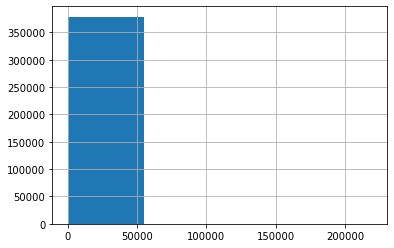

In [16]:
#visualize backers, pledged and goal in bins of 4 

ap_data['backers'].hist(bins=4)
ap_data['backers'].value_counts(sort=False)

In [17]:
backer_bins = pd.cut(ap_data['backers'],4)
backer_bins.value_counts(sort=False)

#at this point, it's clear that theere are 20 outliers in the data that make discretization
#of backers difficult, so I will remove those 20 records

(-219.382, 54845.5]     378634
(54845.5, 109691.0]         18
(109691.0, 164536.5]         1
(164536.5, 219382.0]         1
Name: backers, dtype: int64

In [18]:
#drop outlier backer values (>= 54845.5)
for i in range(len(ap_data)):
    if ap_data.loc[i, 'backers'] >= 54845.5:
        ap_data = ap_data.drop(i)
        
ap_data.info()


KeyError: 2842

In [ ]:
#try visualizing new bins

backer_bins = pd.qcut(ap_data['backers'],4)
graph = backer_bins.value_counts(sort=False)
graph.plot(kind='bar')

In [ ]:
#assing bins to backers column in dataframe
ap_data['backers'] = backer_bins
ap_data.info()
ap_data

In [ ]:
#visualizing bins for pledged

pledged_bins = pd.qcut(ap_data['pledged'],4)
graph = pledged_bins.value_counts(sort=False)
print(graph)
graph.plot(kind='bar')

#assign new bins to pledge column

ap_data['pledged'] = pledged_bins

In [ ]:
#visualizing bins for goal

goal_bins = pd.qcut(ap_data['goal'],4)
graph = goal_bins.value_counts(sort=False)
print(graph)
graph.plot(kind='bar')

#assign new bins to pledge column

ap_data['goal'] = goal_bins

In [ ]:
#check to make sure data has all been converted correctly

ap_data.info()

In [ ]:
ap_data

In [ ]:
import numpy as np
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules 

#turn data into binary
ap_data = pd.get_dummies(ap_data)
ap_data

#running apriori
frq_items = apriori(ap_data, min_support = .05, use_colnames = True)
rules = association_rules(frq_items, metric = 'lift', min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])


In [ ]:
#print results in styled table
rules.style

## Duscussion of Apriori Results:
* Some results are not useful (for example strong confidence bw GB as the country and GBP as the currency)
* Have to scroll past lots of rules with country_US as the consequent
* Based on above two bullets, probably could have removed the currency column before running apriori
* Rule at index 577: if the goal of the campaign was b/w 2K and 5.5K, and the campaign 
    had over 56 backers, there is 96% confidence that the campaign was successful
* Rule at index 179: If a campaigns main category was music and the campaign was successful, 
    there's 90% confidence that the campaign occurred in the US
* Rule at index 1486: if the goal of the campaign was to raise between 0 and 2K and there was between
    12 and 56 backers, there is 89% confidence that the campaign was successful
* For future iterations of running apriori on this dataset
    * remove currency column
    * add new attribute for length of time of campaign
    * add new attribute for season and month of campaign
    * figure out how to avoid so many rules with the goal and pledged as the atecedent and the 
        campaign state as the consequent (this is an association that is the literal definition 
        of the state class, so it's not useful)
    * run the algo with the class variable (state) as the focus

### Phase Six: Duscussion
* Data on campaign marketing (what channels, how much plan to be spent)
* Data on whether backers were in network of founders
* Data on page views, conversion
* Data on time dispersion of backers (what it means if you get lots of backers early on)
* Classification of quality of campaign page (how does campaign page appear?)
* K-means clustering to look at differnt sub-classes
